GAN-BASED MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION
Start Time: 2025-10-26 11:28:55
Approach: Generative Adversarial Network (GAN)
TensorFlow Version: 2.20.0
Random Seed: 42

 Configuration:
   Approach: GAN-based Data Augmentation + CNN
   Image Size: 32x32x3
   GAN Latent Dim: 100
   GAN Epochs: 20
   Classifier Epochs: 15

TASK 2: DATA LOADING AND ANALYSIS

 Original Dataset:
   Training: 34,561
   Validation: 6,491
   Test: 17,778

⚡ Using 10.0% subset for fast training
   Training: 3,456
   Validation: 649

 Class Distribution (Before GAN Augmentation):
   Class 0:  206 samples ( 5.96%)
   Class 1:  133 samples ( 3.85%)
   Class 2:  122 samples ( 3.53%)
   Class 3:  163 samples ( 4.72%)
   Class 4:  409 samples (11.83%)
   Class 5:  390 samples (11.28%)
   Class 6:  598 samples (17.30%)
   Class 7:  383 samples (11.08%)
   Class 8:  380 samples (11.00%)
   Class 9:  313 samples ( 9.06%)
   Class 10:  359 samples (10.39%)

  Class Imbalance Ratio: 4.90:1


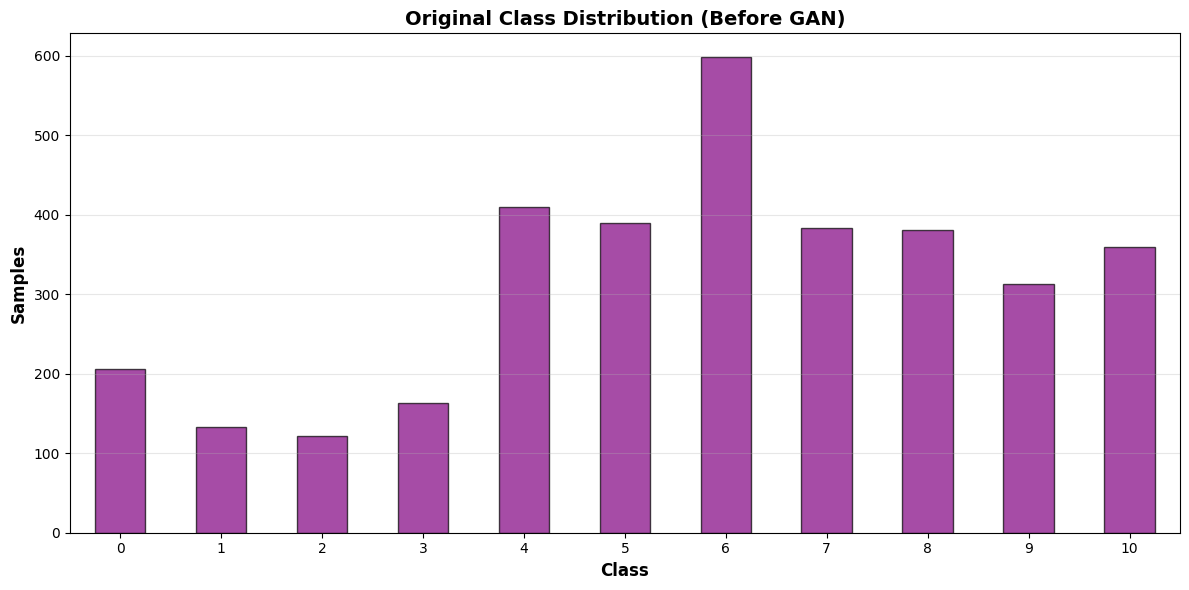


 Task 2 Complete

TASK 3: LOAD REAL IMAGES FOR GAN TRAINING

Technique: Load and preprocess images for GAN
  - Resize to 32x32
  - Normalize to [-1, 1] range (for GAN)

Loading up to 500 images...


Loading: 100%|██████████| 500/500 [00:08<00:00, 57.43it/s]



 Loaded 500 real images
   Shape: (500, 32, 32, 3)
   Value range: [-1.00, 1.00]


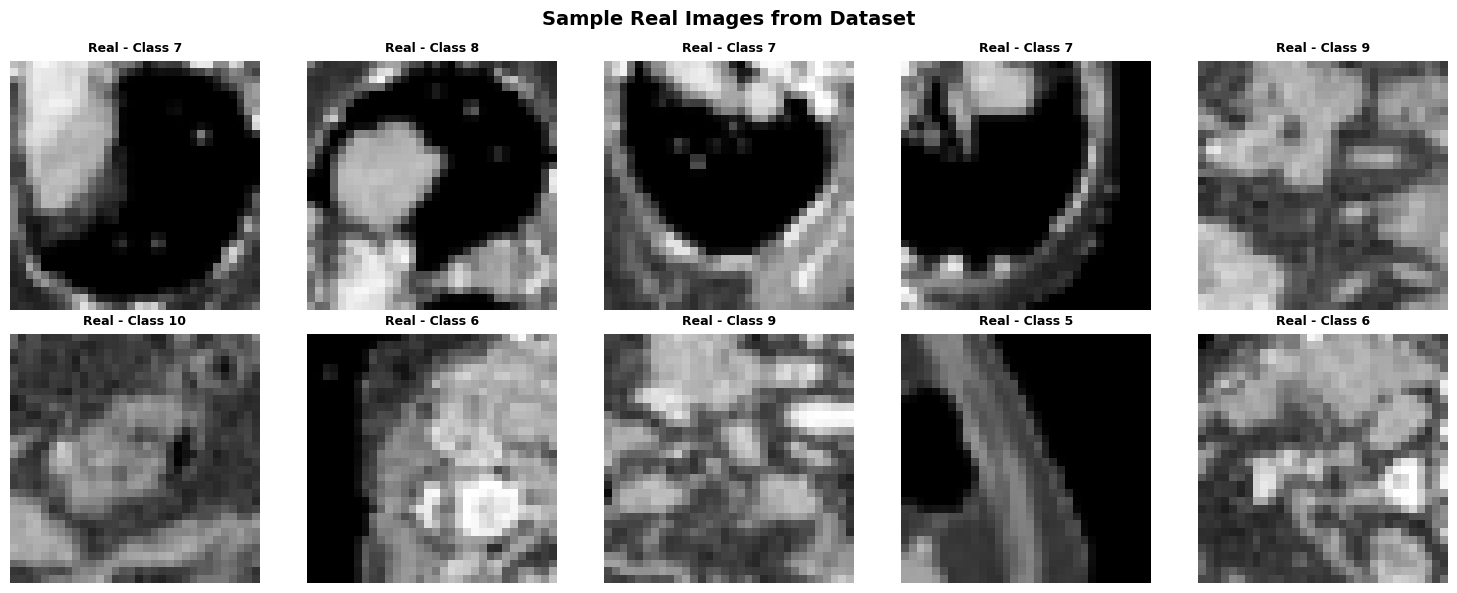


 Task 3 Complete

TASK 4: GAN ARCHITECTURE

GAN Architecture: Deep Convolutional GAN (DCGAN)

Generator:
  Input: Noise vector (100-dim)
  ├── Dense(4×4×256) → Reshape
  ├── Conv2DTranspose(128) → BatchNorm → LeakyReLU
  ├── Conv2DTranspose(64) → BatchNorm → LeakyReLU
  └── Conv2DTranspose(3) → Tanh
  Output: 32×32×3 image

Discriminator:
  Input: 32×32×3 image
  ├── Conv2D(64) → LeakyReLU → Dropout
  ├── Conv2D(128) → BatchNorm → LeakyReLU → Dropout
  ├── Flatten
  └── Dense(1) → Sigmoid
  Output: Real/Fake probability

 Generator Architecture:


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 16, 16, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 32)     │        32,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,103,811 (4.21 MB)

 Trainable params: 1,103,363 (4.21 MB)

 Non-trainable params: 448 (1.75 KB)


 Discriminator Architecture:


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,449 (1.44 MB)

 Trainable params: 375,681 (1.43 MB)

 Non-trainable params: 768 (3.00 KB)


 Task 4 Complete: GAN models built
   Generator params: 1,103,811
   Discriminator params: 376,449

TASK 5: GAN TRAINING

Training Algorithm: Adversarial Training
  1. Train Discriminator on real images (label=1)
  2. Train Discriminator on fake images (label=0)
  3. Train Generator to fool Discriminator (label=1)

Mathematical Formulation:
  min_G max_D V(D,G) = E[log D(x)] + E[log(1 - D(G(z)))]

STARTING GAN TRAINING

⏳ Training GAN for 20 epochs...
   Batch size: 64
   Steps per epoch: 7
   Epoch 1/20 - D_loss: 0.7030, G_loss: 0.7084
   Epoch 5/20 - D_loss: 0.7020, G_loss: 0.5880
   Epoch 10/20 - D_loss: 0.7057, G_loss: 0.5144
   Epoch 15/20 - D_loss: 0.7116, G_loss: 0.4532
   Epoch 20/20 - D_loss: 0.7221, G_loss: 0.4003

 GAN Training Complete!
   Training time: 39.56s (0.66 min)


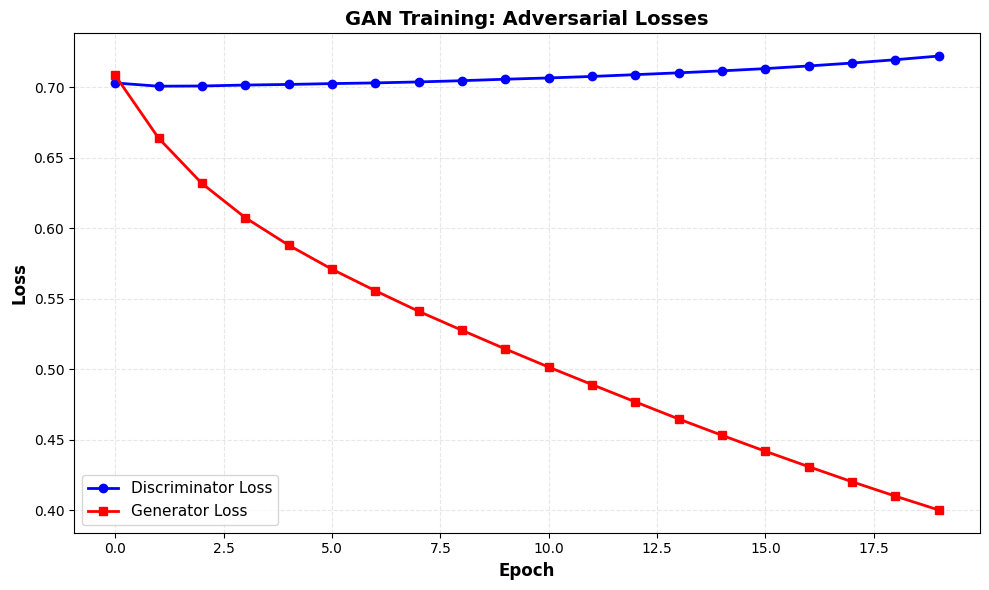

   Generator saved: gan_generator.h5

 Task 5 Complete

TASK 6: GENERATE SYNTHETIC IMAGES FOR AUGMENTATION

Strategy: Augment minority classes with synthetic data
  Target: 100 synthetic samples per class

 Generating synthetic images...
 Generated 1100 synthetic images


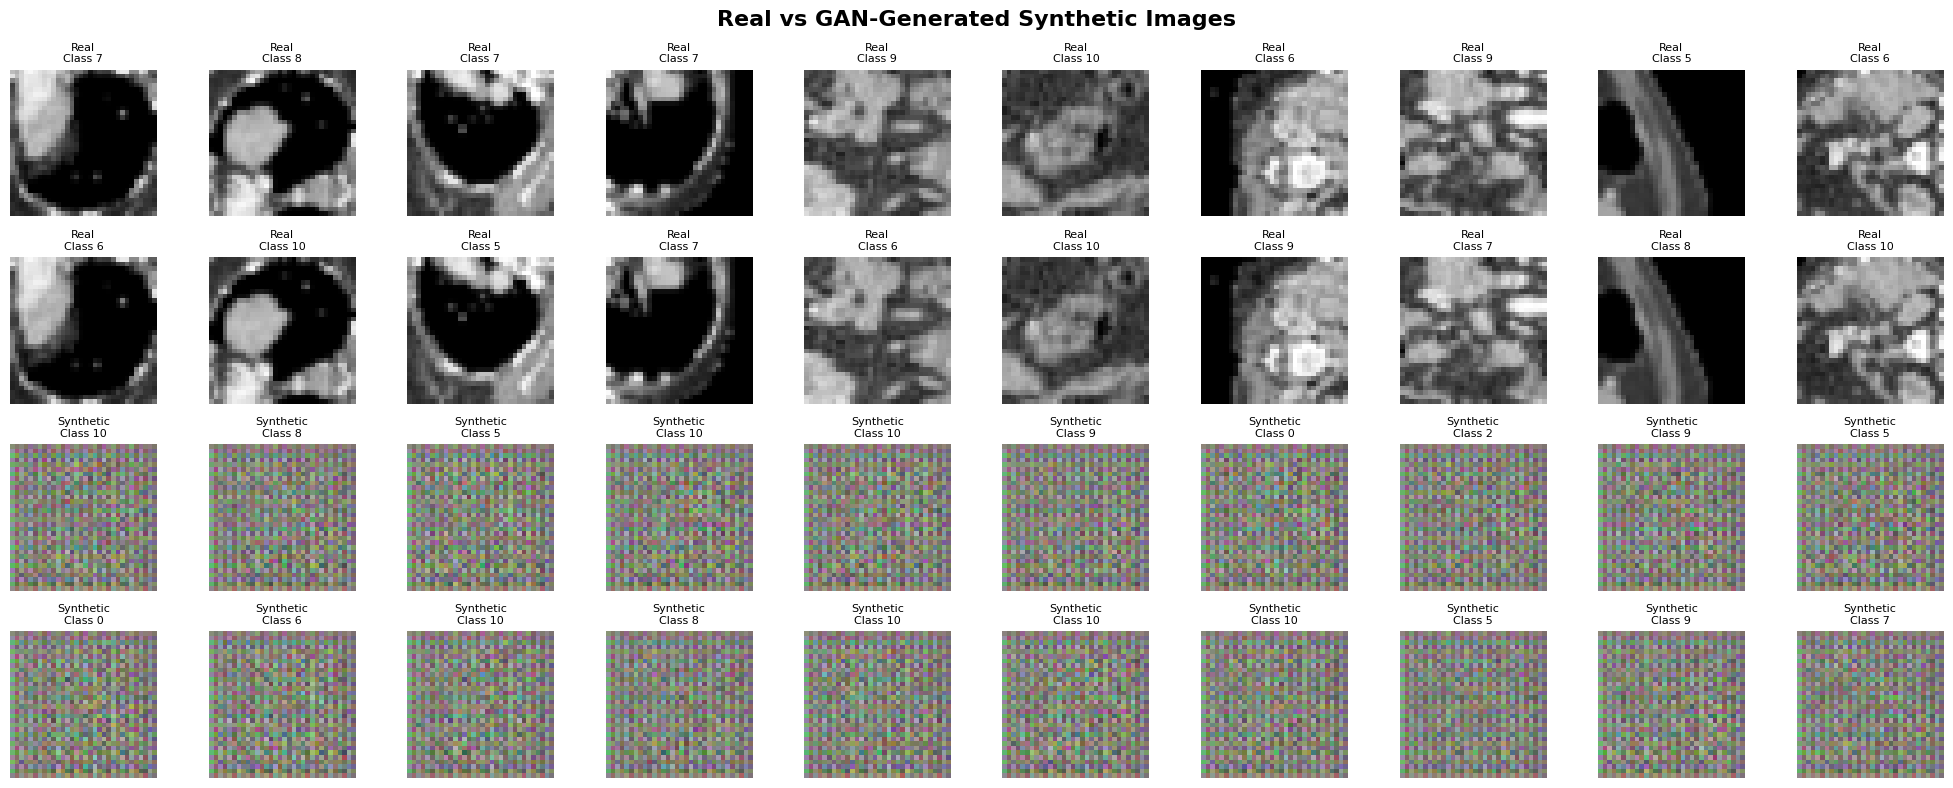


 Augmented Dataset:
   Real images: 500
   Synthetic images: 1100
   Total: 1600

 Class Distribution (After GAN Augmentation):
   Class 0:  128 samples ( 8.00%)
   Class 1:  115 samples ( 7.19%)
   Class 2:  122 samples ( 7.62%)
   Class 3:  120 samples ( 7.50%)
   Class 4:  148 samples ( 9.25%)
   Class 5:  161 samples (10.06%)
   Class 6:  199 samples (12.44%)
   Class 7:  146 samples ( 9.12%)
   Class 8:  157 samples ( 9.81%)
   Class 9:  151 samples ( 9.44%)
   Class 10:  153 samples ( 9.56%)


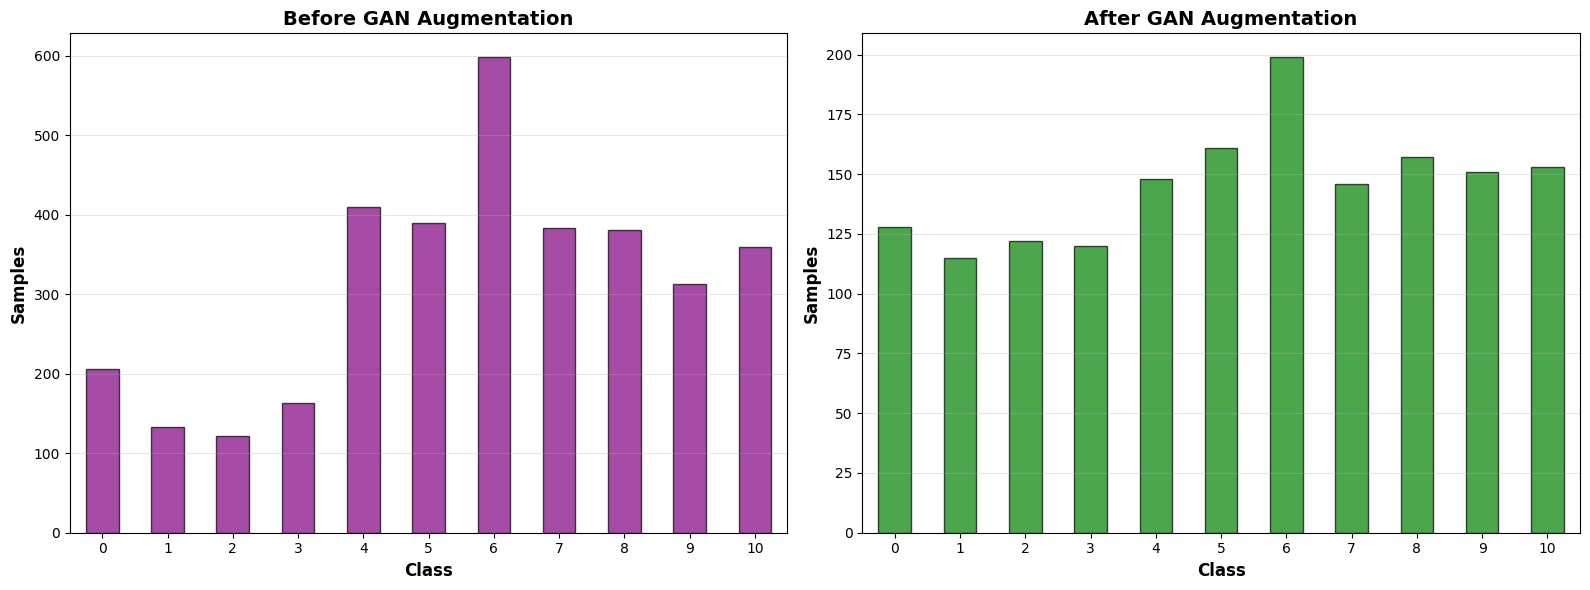


 Task 6 Complete: Dataset augmented with GAN-generated images

TASK 7: PREPARE DATA FOR CNN CLASSIFIER

Creating temporary augmented dataset...
Saving 1600 augmented images...


Saving: 100%|██████████| 1600/1600 [00:01<00:00, 1232.95it/s]

Found 1600 validated image filenames belonging to 11 classes.
Found 649 validated image filenames belonging to 11 classes.



 Data generators created:
   Training batches: 7
   Validation batches: 3
   Training samples: 1600
   Validation samples: 649

 Task 7 Complete

TASK 8: CNN CLASSIFIER TRAINING (on GAN-augmented data)

Classifier Architecture: CNN
  Input: 32×32×3
  ├── Conv2D(32) → MaxPool → Dropout(0.25)
  ├── Conv2D(64) → MaxPool → Dropout(0.25)
  ├── Conv2D(128) → MaxPool → Dropout(0.25)
  ├── Flatten → Dense(128) → Dropout(0.5)
  └── Dense(11, softmax)

 Classifier Architecture:


Model: "GAN_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)


  Training Configuration:
   Epochs: 15
   Batch Size: 256
   Learning Rate: 0.001
   Training on: Real + GAN-generated images
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1004 - loss: 2.4639
Epoch 1: val_accuracy improved from None to 0.13559, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 12s/step - accuracy: 0.1050 - loss: 2.4501 - val_accuracy: 0.1356 - val_loss: 2.3889
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.1222 - loss: 2.4065
Epoch 2: val_accuracy did not improve from 0.13559
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - accuracy: 0.1194 - loss: 2.4152 - val_accuracy: 0.1356 - val_loss: 2.3800
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.1092 - loss: 2.4162
Epoch 3: val_accuracy improved from 0.13559 to 0.24499, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 711ms/step - accuracy: 0.1194 - loss: 2.4099 - val_accuracy: 0.2450 - val_loss: 2.3677
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.1339 - loss: 2.4178
Epoch 4: val_accuracy improved from 0.24499 to 0.27273, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 633ms/step - accuracy: 0.1287 - loss: 2.4034 - val_accuracy: 0.2727 - val_loss: 2.3300
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1544 - loss: 2.3782
Epoch 5: val_accuracy improved from 0.27273 to 0.27581, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.1475 - loss: 2.3885 - val_accuracy: 0.2758 - val_loss: 2.2038
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.1429 - loss: 2.3714
Epoch 6: val_accuracy improved from 0.27581 to 0.28814, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 0.1494 - loss: 2.3641 - val_accuracy: 0.2881 - val_loss: 1.9872
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.1516 - loss: 2.3368
Epoch 7: val_accuracy improved from 0.28814 to 0.32357, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.1494 - loss: 2.3261 - val_accuracy: 0.3236 - val_loss: 1.8234
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.1583 - loss: 2.3238
Epoch 8: val_accuracy improved from 0.32357 to 0.40524, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.1506 - loss: 2.3181 - val_accuracy: 0.4052 - val_loss: 1.7810
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.1763 - loss: 2.3094
Epoch 9: val_accuracy did not improve from 0.40524
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.1669 - loss: 2.2954 - val_accuracy: 0.3821 - val_loss: 1.7636
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.1862 - loss: 2.2938
Epoch 10: val_accuracy improved from 0.40524 to 0.40678, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 678ms/step - accuracy: 0.1762 - loss: 2.2872 - val_accuracy: 0.4068 - val_loss: 1.7070
Epoch 11/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.1812 - loss: 2.2744
Epoch 11: val_accuracy improved from 0.40678 to 0.44684, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 611ms/step - accuracy: 0.1850 - loss: 2.2676 - val_accuracy: 0.4468 - val_loss: 1.6348
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.1864 - loss: 2.2907
Epoch 12: val_accuracy improved from 0.44684 to 0.50231, saving model to ./results_gan_complete/gan_classifier.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.1856 - loss: 2.2779 - val_accuracy: 0.5023 - val_loss: 1.6331
Epoch 13/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.1819 - loss: 2.2591
Epoch 13: val_accuracy did not improve from 0.50231
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.1794 - loss: 2.2562 - val_accuracy: 0.4653 - val_loss: 1.6051
Epoch 14/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1934 - loss: 2.2226
Epoch 14: val_accuracy did not improve from 0.50231
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.1906 - loss: 2.2324 - val_accuracy: 0.4700 - val_loss: 1.5339
Epoch 15/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.1860 - loss: 2.2273
Epoch 15: val_accuracy did not improve from 0.50231
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.1838 - loss: 2.2348 - val_accuracy: 0.4946 - val_loss: 1.5009
Restoring model weights from the end of the best epoch: 15.

 Classifier Training Complete!
   Time: 142.29s (2.37 min)
   Epochs

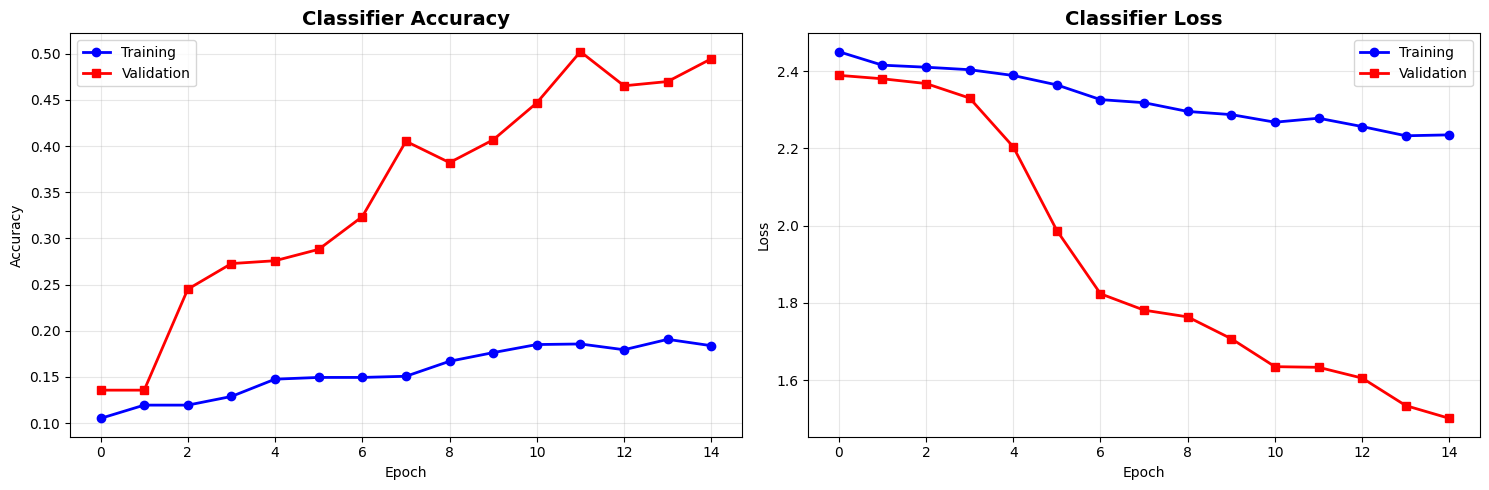


 Task 8 Complete

TASK 9: PERFORMANCE EVALUATION



 Generating predictions...

PERFORMANCE METRICS

 Overall Performance:
   Accuracy  = 0.5023 (50.23%)
   Precision = 0.5022 (50.22%)
   Recall    = 0.5023 (50.23%)
   F1-Score  = 0.4279 (42.79%)

 Metric Definitions:
   Accuracy  = (TP + TN) / Total
   Precision = TP / (TP + FP)
   Recall    = TP / (TP + FN)
   F1-Score  = 2 × (Precision × Recall) / (Precision + Recall)

              precision    recall  f1-score   support

     Class 0     0.0000    0.0000    0.0000        38
     Class 1     0.0000    0.0000    0.0000        31
     Class 2     0.2019    0.6562    0.3088        64
     Class 3     1.0000    0.2609    0.4138        23
     Class 4     0.2000    0.0455    0.0741        44
     Class 5     0.0000    0.0000    0.0000        50
     Class 6     0.0000    0.0000    0.0000        49
     Class 7     0.3909    0.9773    0.5584        88
     Class 8     0.9697    0.8807    0.9231       109
     Class 9     0.8846    0.8932    0.8889       103
    Class 10     1.0000    0.0

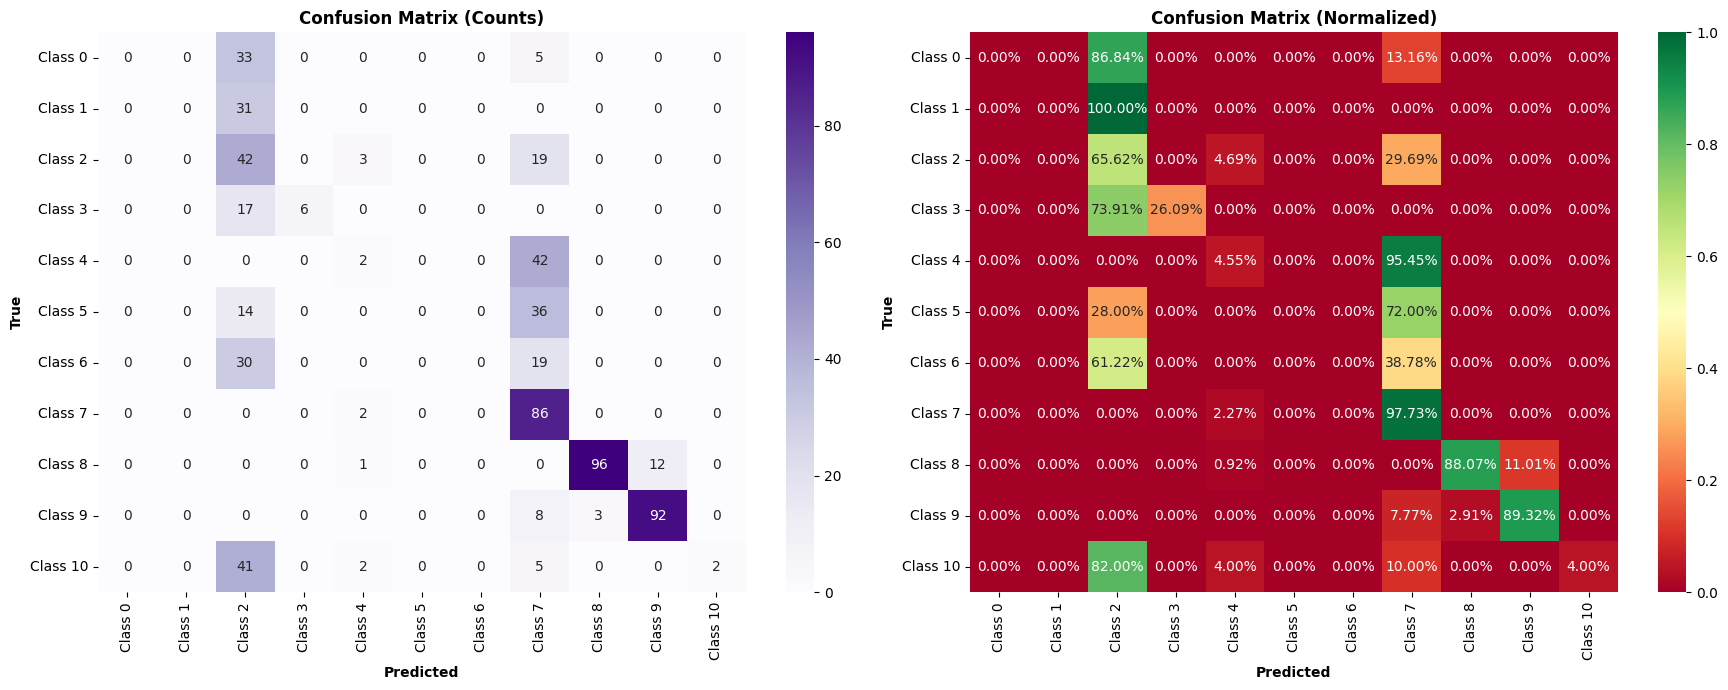


 Generating ROC curves...


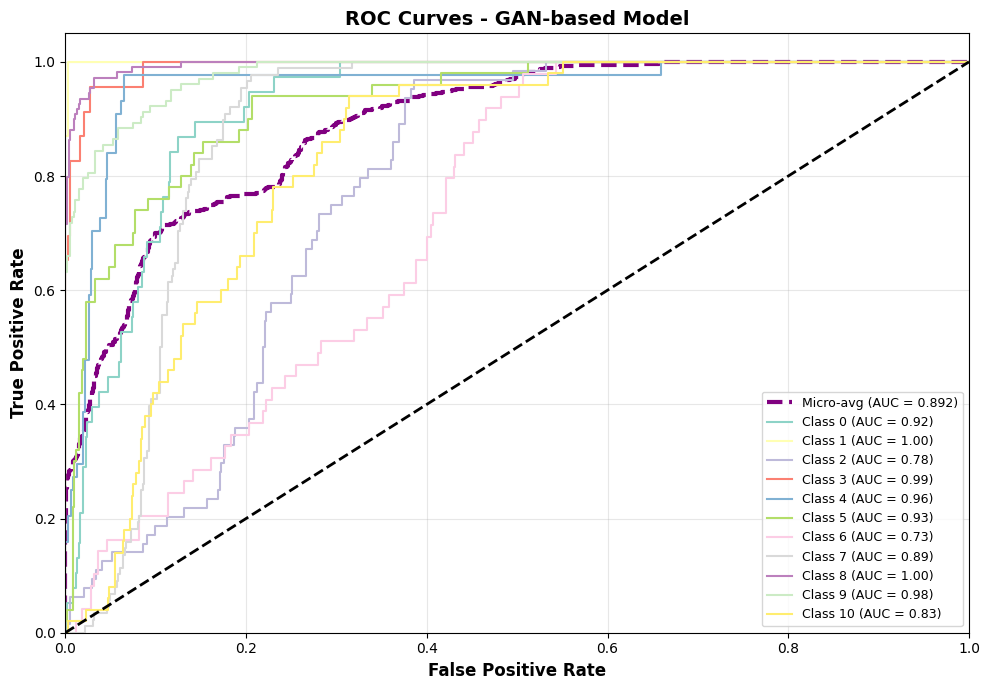

 Micro-average AUC: 0.8917

 Task 9 Complete

TASK 10: VISUAL ANALYSIS

 Correct: 326
 Incorrect: 323


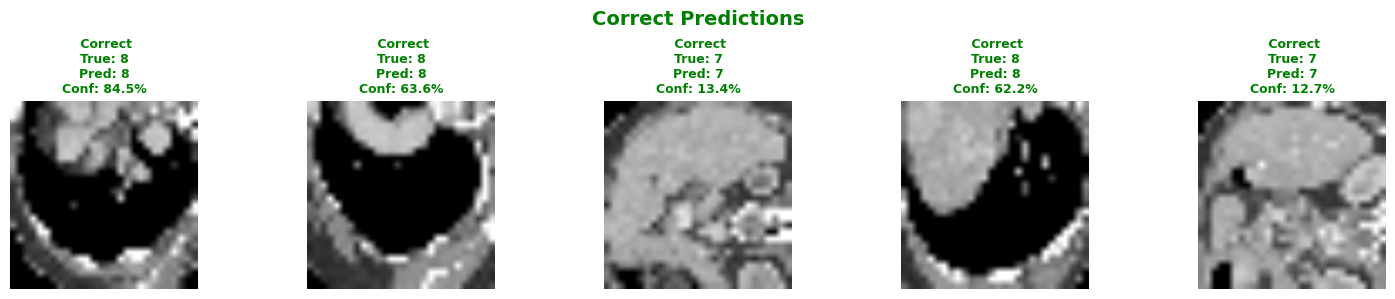

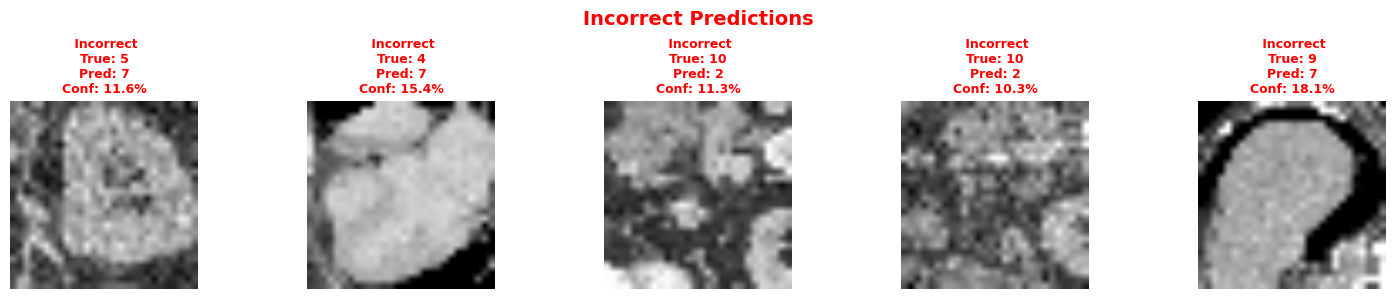


 Task 10 Complete

TASK 11: TEST SET PREDICTIONS
Found 17778 validated image filenames.

🔮 Generating test predictions...
 Test predictions saved (17778 samples)

 Task 11 Complete

 GAN-BASED CLASSIFICATION COMPLETED!

 Complete Summary:
   Total Time: 6.40 minutes
   GAN Training: 0.66 min
   Classifier Training: 2.37 min
   Final Accuracy: 50.23%
   Synthetic Images: 1100

 All Results: ./results_gan_complete/

 Generated Files:
   1. assignment_summary.json
   2. classification_report.txt
   3. test_predictions.csv
   4. model_comparison.csv
   5. gan_generator.h5
   6. gan_classifier.h5

 Visualizations:
   1. 01_original_distribution.png
   2. 02_real_samples.png
   3. 03_gan_training_losses.png
   4. 04_real_vs_synthetic.png
   5. 05_augmentation_effect.png
   6. 06_classifier_learning_curves.png
   7. 07_confusion_matrix.png
   8. 08_roc_curves.png
   9. 09_correct_predictions.png
   10. 10_incorrect_predictions.png
   + Generated images in generated_images/

 GAN APPROACH COM

In [ ]:


# =============================================================================
# TASK 1: SETUP AND IMPORTS


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
import time
from datetime import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

# Machine Learning Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight

from PIL import Image

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

start_time_total = time.time()

print("="*80)
print("GAN-BASED MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION")
print("="*80)
print(f"Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Approach: Generative Adversarial Network (GAN)")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Random Seed: {RANDOM_SEED}")
print("="*80)

# =============================================================================
# CONFIGURATION
# =============================================================================

class Config:
    """Configuration for GAN-based classification"""
    
    # === FILE PATHS ===
    TRAIN_CSV = 'labels_train.csv'
    VAL_CSV = 'labels_val.csv'
    TEST_CSV = 'manifest_public.csv'
    
    TRAIN_IMAGE_DIR = 'images_train/'
    VAL_IMAGE_DIR = 'images_val/'
    TEST_IMAGE_DIR = 'images/'
    
    RESULTS_DIR = './results_gan_complete/'
    GAN_MODEL_PATH = 'gan_generator.h5'
    CLASSIFIER_MODEL_PATH = 'gan_classifier.h5'
    
    # === DATASET PARAMETERS ===
    NUM_CLASSES = 11
    USE_SUBSET = True
    SUBSET_FRACTION = 0.10
    
    # === IMAGE PARAMETERS ===
    IMG_HEIGHT = 32
    IMG_WIDTH = 32
    IMG_CHANNELS = 3
    
    # === GAN PARAMETERS ===
    LATENT_DIM = 100           # Noise vector dimension
    GAN_EPOCHS = 20            # Epochs for GAN training
    GAN_BATCH_SIZE = 64        # Batch size for GAN
    GENERATOR_LR = 0.0002      # Generator learning rate
    DISCRIMINATOR_LR = 0.0002  # Discriminator learning rate
    
    # Generate synthetic samples for minority classes
    GAN_AUGMENTATION = True
    SAMPLES_PER_CLASS = 100    # Generate this many samples per minority class
    
    # === CLASSIFIER PARAMETERS ===
    BATCH_SIZE = 256
    EPOCHS = 15
    LEARNING_RATE = 0.001
    
    # Data augmentation (applied to real images)
    ROTATION_RANGE = 10
    WIDTH_SHIFT_RANGE = 0.1
    HEIGHT_SHIFT_RANGE = 0.1
    ZOOM_RANGE = 0.1
    HORIZONTAL_FLIP = True
    
    DROPOUT_RATE = 0.25
    DENSE_UNITS = 128
    
    CLASS_NAMES = {
        0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3',
        4: 'Class 4', 5: 'Class 5', 6: 'Class 6', 7: 'Class 7',
        8: 'Class 8', 9: 'Class 9', 10: 'Class 10'
    }

config = Config()
os.makedirs(config.RESULTS_DIR, exist_ok=True)
os.makedirs(f'{config.RESULTS_DIR}generated_images/', exist_ok=True)

print(f"\n Configuration:")
print(f"   Approach: GAN-based Data Augmentation + CNN")
print(f"   Image Size: {config.IMG_WIDTH}x{config.IMG_HEIGHT}x{config.IMG_CHANNELS}")
print(f"   GAN Latent Dim: {config.LATENT_DIM}")
print(f"   GAN Epochs: {config.GAN_EPOCHS}")
print(f"   Classifier Epochs: {config.EPOCHS}")

# =============================================================================
# TASK 2: DATA LOADING AND ANALYSIS


print("\n" + "="*80)
print("TASK 2: DATA LOADING AND ANALYSIS")
print("="*80)

train_df = pd.read_csv(config.TRAIN_CSV)
val_df = pd.read_csv(config.VAL_CSV)
test_df = pd.read_csv(config.TEST_CSV)

print(f"\n Original Dataset:")
print(f"   Training: {len(train_df):,}")
print(f"   Validation: {len(val_df):,}")
print(f"   Test: {len(test_df):,}")

# Apply subset
if config.USE_SUBSET:
    print(f"\n Using {config.SUBSET_FRACTION*100}% subset for fast training")
    train_df = train_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    val_df = val_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    print(f"   Training: {len(train_df):,}")
    print(f"   Validation: {len(val_df):,}")

# Class distribution
print("\n Class Distribution (Before GAN Augmentation):")
train_class_counts = train_df['label'].value_counts().sort_index()
for cls in range(config.NUM_CLASSES):
    count = train_class_counts.get(cls, 0)
    percentage = (count / len(train_df)) * 100
    print(f"   Class {cls}: {count:4,} samples ({percentage:5.2f}%)")

max_count = train_class_counts.max()
min_count = train_class_counts.min()
imbalance_ratio = max_count / min_count
print(f"\n  Class Imbalance Ratio: {imbalance_ratio:.2f}:1")

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_class_counts.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black', ax=ax)
ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Samples', fontsize=12, fontweight='bold')
ax.set_title('Original Class Distribution (Before GAN)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}01_original_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 2 Complete")

# =============================================================================
# TASK 3: LOAD REAL IMAGES FOR GAN TRAINING

print("\n" + "="*80)
print("TASK 3: LOAD REAL IMAGES FOR GAN TRAINING")
print("="*80)

print("\nTechnique: Load and preprocess images for GAN")
print(f"  - Resize to {config.IMG_WIDTH}x{config.IMG_HEIGHT}")
print(f"  - Normalize to [-1, 1] range (for GAN)")

def load_images_for_gan(df, image_dir, config, max_samples=500):
    """Load images for GAN training"""
    images = []
    labels = []
    
    print(f"\nLoading up to {max_samples} images...")
    sample_df = df.head(max_samples) if len(df) > max_samples else df
    
    for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc="Loading"):
        img_path = os.path.join(image_dir, row['file'])
        
        if not os.path.exists(img_path):
            continue
        
        try:
            img = Image.open(img_path)
            img = img.resize((config.IMG_WIDTH, config.IMG_HEIGHT))
            img_array = np.array(img)
            
            # Convert grayscale to RGB if needed
            if len(img_array.shape) == 2:
                img_array = np.stack([img_array] * 3, axis=-1)
            
            # Normalize to [-1, 1] for GAN
            img_array = (img_array.astype('float32') - 127.5) / 127.5
            
            images.append(img_array)
            labels.append(row['label'])
        except:
            continue
    
    return np.array(images), np.array(labels)

# Load images
X_real, y_real = load_images_for_gan(train_df, config.TRAIN_IMAGE_DIR, config)

print(f"\n Loaded {len(X_real)} real images")
print(f"   Shape: {X_real.shape}")
print(f"   Value range: [{X_real.min():.2f}, {X_real.max():.2f}]")

# Show sample real images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    img = (X_real[i] + 1) / 2.0  # Denormalize for display
    axes[i].imshow(img)
    axes[i].set_title(f'Real - Class {y_real[i]}', fontsize=9, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Sample Real Images from Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}02_real_samples.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 3 Complete")

# =============================================================================
# TASK 4: BUILD GAN ARCHITECTURE


print("\n" + "="*80)
print("TASK 4: GAN ARCHITECTURE")
print("="*80)

print("\nGAN Architecture: Deep Convolutional GAN (DCGAN)")
print("\nGenerator:")
print("  Input: Noise vector (100-dim)")
print("  ├── Dense(4×4×256) → Reshape")
print("  ├── Conv2DTranspose(128) → BatchNorm → LeakyReLU")
print("  ├── Conv2DTranspose(64) → BatchNorm → LeakyReLU")
print("  └── Conv2DTranspose(3) → Tanh")
print("  Output: 32×32×3 image")
print("\nDiscriminator:")
print("  Input: 32×32×3 image")
print("  ├── Conv2D(64) → LeakyReLU → Dropout")
print("  ├── Conv2D(128) → BatchNorm → LeakyReLU → Dropout")
print("  ├── Flatten")
print("  └── Dense(1) → Sigmoid")
print("  Output: Real/Fake probability")

def build_generator(latent_dim, img_shape):
    """
    Generator Network
    Transforms random noise into realistic images
    """
    model = models.Sequential(name='Generator')
    
    # Foundation
    model.add(layers.Dense(4 * 4 * 256, input_dim=latent_dim))
    model.add(layers.Reshape((4, 4, 256)))
    
    # Upsample to 8x8
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Upsample to 16x16
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Upsample to 32x32
    model.add(layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Output layer
    model.add(layers.Conv2D(img_shape[2], (3, 3), padding='same', activation='tanh'))
    
    return model

def build_discriminator(img_shape):
    """
    Discriminator Network
    Classifies images as real or fake
    """
    model = models.Sequential(name='Discriminator')
    
    # Downsample to 16x16
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same',
                           input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Downsample to 8x8
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Downsample to 4x4
    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Classification
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Build models
img_shape = (config.IMG_HEIGHT, config.IMG_WIDTH, config.IMG_CHANNELS)
generator = build_generator(config.LATENT_DIM, img_shape)
discriminator = build_discriminator(img_shape)

print("\n Generator Architecture:")
generator.summary()

print("\n Discriminator Architecture:")
discriminator.summary()

# Compile discriminator
discriminator.compile(
    optimizer=keras.optimizers.Adam(learning_rate=config.DISCRIMINATOR_LR, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Build and compile GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(config.LATENT_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
gan = models.Model(gan_input, gan_output, name='GAN')

gan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=config.GENERATOR_LR, beta_1=0.5),
    loss='binary_crossentropy'
)

print(f"\n Task 4 Complete: GAN models built")
print(f"   Generator params: {generator.count_params():,}")
print(f"   Discriminator params: {discriminator.count_params():,}")

# =============================================================================
# TASK 5: TRAIN GAN


print("\n" + "="*80)
print("TASK 5: GAN TRAINING")
print("="*80)

print("\nTraining Algorithm: Adversarial Training")
print("  1. Train Discriminator on real images (label=1)")
print("  2. Train Discriminator on fake images (label=0)")
print("  3. Train Generator to fool Discriminator (label=1)")
print("\nMathematical Formulation:")
print("  min_G max_D V(D,G) = E[log D(x)] + E[log(1 - D(G(z)))]")

def train_gan(generator, discriminator, gan, X_real, config):
    """Train GAN with adversarial process"""
    
    batch_size = config.GAN_BATCH_SIZE
    epochs = config.GAN_EPOCHS
    
    # Labels for training
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    
    d_losses = []
    g_losses = []
    
    print(f"\n Training GAN for {epochs} epochs...")
    print(f"   Batch size: {batch_size}")
    print(f"   Steps per epoch: {len(X_real) // batch_size}")
    
    for epoch in range(epochs):
        epoch_d_loss = []
        epoch_g_loss = []
        
        # Shuffle data
        indices = np.random.permutation(len(X_real))
        X_shuffled = X_real[indices]
        
        for i in range(len(X_real) // batch_size):
            # Get real images
            real_imgs = X_shuffled[i*batch_size:(i+1)*batch_size]
            
            # Generate fake images
            noise = np.random.normal(0, 1, (batch_size, config.LATENT_DIM))
            fake_imgs = generator.predict(noise, verbose=0)
            
            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # Train generator
            noise = np.random.normal(0, 1, (batch_size, config.LATENT_DIM))
            g_loss = gan.train_on_batch(noise, real_labels)
            
            epoch_d_loss.append(d_loss[0])
            epoch_g_loss.append(g_loss)
        
        # Record losses
        d_losses.append(np.mean(epoch_d_loss))
        g_losses.append(np.mean(epoch_g_loss))
        
        # Print progress
        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"   Epoch {epoch+1}/{epochs} - D_loss: {d_losses[-1]:.4f}, G_loss: {g_losses[-1]:.4f}")
            
            # Generate sample images
            noise = np.random.normal(0, 1, (10, config.LATENT_DIM))
            generated = generator.predict(noise, verbose=0)
            
            fig, axes = plt.subplots(1, 10, figsize=(20, 2))
            for j in range(10):
                img = (generated[j] + 1) / 2.0
                axes[j].imshow(img)
                axes[j].axis('off')
            plt.suptitle(f'Generated Images - Epoch {epoch+1}', fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'{config.RESULTS_DIR}generated_images/epoch_{epoch+1:02d}.png', 
                       dpi=150, bbox_inches='tight')
            plt.close()
    
    return d_losses, g_losses

# Train GAN
print(f"\n{'='*80}")
print("STARTING GAN TRAINING")
print(f"{'='*80}")

train_start = time.time()
d_losses, g_losses = train_gan(generator, discriminator, gan, X_real, config)
gan_train_time = time.time() - train_start

print(f"\n GAN Training Complete!")
print(f"   Training time: {gan_train_time:.2f}s ({gan_train_time/60:.2f} min)")

# Plot training losses
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(d_losses, 'b-', linewidth=2, label='Discriminator Loss', marker='o')
ax.plot(g_losses, 'r-', linewidth=2, label='Generator Loss', marker='s')
ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('GAN Training: Adversarial Losses', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}03_gan_training_losses.png', dpi=300, bbox_inches='tight')
plt.show()

# Save generator
generator.save(os.path.join(config.RESULTS_DIR, config.GAN_MODEL_PATH))
print(f"   Generator saved: {config.GAN_MODEL_PATH}")

print(f"\n Task 5 Complete")

# =============================================================================
# TASK 6: GENERATE SYNTHETIC IMAGES


print("\n" + "="*80)
print("TASK 6: GENERATE SYNTHETIC IMAGES FOR AUGMENTATION")
print("="*80)

print(f"\nStrategy: Augment minority classes with synthetic data")
print(f"  Target: {config.SAMPLES_PER_CLASS} synthetic samples per class")

# Generate synthetic images
print("\n Generating synthetic images...")

n_synthetic = config.SAMPLES_PER_CLASS * config.NUM_CLASSES
noise = np.random.normal(0, 1, (n_synthetic, config.LATENT_DIM))
synthetic_images = generator.predict(noise, verbose=0)

# Assign random labels (balanced across classes)
synthetic_labels = np.repeat(range(config.NUM_CLASSES), config.SAMPLES_PER_CLASS)
np.random.shuffle(synthetic_labels)

print(f" Generated {len(synthetic_images)} synthetic images")

# Visualize real vs synthetic
fig, axes = plt.subplots(4, 10, figsize=(20, 8))

# Real images
for i in range(10):
    img = (X_real[i] + 1) / 2.0
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Real\nClass {y_real[i]}', fontsize=8)
    axes[0, i].axis('off')
    
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Real\nClass {y_real[i+10]}', fontsize=8)
    axes[1, i].axis('off')

# Synthetic images
for i in range(10):
    img = (synthetic_images[i] + 1) / 2.0
    axes[2, i].imshow(img)
    axes[2, i].set_title(f'Synthetic\nClass {synthetic_labels[i]}', fontsize=8)
    axes[2, i].axis('off')
    
    img = (synthetic_images[i+10] + 1) / 2.0
    axes[3, i].imshow(img)
    axes[3, i].set_title(f'Synthetic\nClass {synthetic_labels[i+10]}', fontsize=8)
    axes[3, i].axis('off')

plt.suptitle('Real vs GAN-Generated Synthetic Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}04_real_vs_synthetic.png', dpi=300, bbox_inches='tight')
plt.show()

# Combine real and synthetic data
X_augmented = np.concatenate([X_real, synthetic_images])
y_augmented = np.concatenate([y_real, synthetic_labels])

print(f"\n Augmented Dataset:")
print(f"   Real images: {len(X_real)}")
print(f"   Synthetic images: {len(synthetic_images)}")
print(f"   Total: {len(X_augmented)}")

# Show new class distribution
augmented_counts = pd.Series(y_augmented).value_counts().sort_index()
print(f"\n Class Distribution (After GAN Augmentation):")
for cls in range(config.NUM_CLASSES):
    count = augmented_counts.get(cls, 0)
    percentage = (count / len(y_augmented)) * 100
    print(f"   Class {cls}: {count:4,} samples ({percentage:5.2f}%)")

# Visualize before/after
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before
train_class_counts.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Samples', fontsize=12, fontweight='bold')
axes[0].set_title('Before GAN Augmentation', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# After
augmented_counts.plot(kind='bar', color='green', alpha=0.7, edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Samples', fontsize=12, fontweight='bold')
axes[1].set_title('After GAN Augmentation', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}05_augmentation_effect.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 6 Complete: Dataset augmented with GAN-generated images")

# =============================================================================
# TASK 7: PREPARE DATA FOR CLASSIFIER


print("\n" + "="*80)
print("TASK 7: PREPARE DATA FOR CNN CLASSIFIER")
print("="*80)

# Convert augmented data back to [0, 255] and save temporarily
print("\nCreating temporary augmented dataset...")

# Denormalize images
X_augmented_denorm = ((X_augmented + 1) * 127.5).astype(np.uint8)

# Create augmented dataframe
augmented_train_data = []
for i, (img, label) in enumerate(zip(X_augmented_denorm, y_augmented)):
    filename = f'aug_{i:05d}.png'
    augmented_train_data.append({'file': filename, 'label': str(label)})

augmented_train_df = pd.DataFrame(augmented_train_data)

# Save augmented images to temp directory
temp_aug_dir = f'{config.RESULTS_DIR}augmented_train/'
os.makedirs(temp_aug_dir, exist_ok=True)

print(f"Saving {len(X_augmented_denorm)} augmented images...")
for i, img in enumerate(tqdm(X_augmented_denorm, desc="Saving")):
    Image.fromarray(img).save(os.path.join(temp_aug_dir, f'aug_{i:05d}.png'))

# Prepare validation data
val_df['label'] = val_df['label'].astype(str)

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=config.ROTATION_RANGE,
    width_shift_range=config.WIDTH_SHIFT_RANGE,
    height_shift_range=config.HEIGHT_SHIFT_RANGE,
    zoom_range=config.ZOOM_RANGE,
    horizontal_flip=config.HORIZONTAL_FLIP
)

val_datagen = ImageDataGenerator(rescale=1./255)

color_mode = 'rgb' if config.IMG_CHANNELS == 3 else 'grayscale'

train_generator = train_datagen.flow_from_dataframe(
    dataframe=augmented_train_df,
    directory=temp_aug_dir,
    x_col='file',
    y_col='label',
    target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
    batch_size=config.BATCH_SIZE,
    class_mode='categorical',
    color_mode=color_mode,
    shuffle=True,
    seed=RANDOM_SEED
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=config.VAL_IMAGE_DIR,
    x_col='file',
    y_col='label',
    target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
    batch_size=config.BATCH_SIZE,
    class_mode='categorical',
    color_mode=color_mode,
    shuffle=False
)

print(f"\n Data generators created:")
print(f"   Training batches: {len(train_generator)}")
print(f"   Validation batches: {len(val_generator)}")
print(f"   Training samples: {train_generator.n}")
print(f"   Validation samples: {val_generator.n}")

print(f"\n Task 7 Complete")


# TASK 8: BUILD AND TRAIN CLASSIFIER

print("\n" + "="*80)
print("TASK 8: CNN CLASSIFIER TRAINING (on GAN-augmented data)")
print("="*80)

print("\nClassifier Architecture: CNN")
print("  Input: 32×32×3")
print("  ├── Conv2D(32) → MaxPool → Dropout(0.25)")
print("  ├── Conv2D(64) → MaxPool → Dropout(0.25)")
print("  ├── Conv2D(128) → MaxPool → Dropout(0.25)")
print("  ├── Flatten → Dense(128) → Dropout(0.5)")
print("  └── Dense(11, softmax)")

def build_classifier(input_shape, num_classes, config):
    """Build CNN classifier"""
    model = models.Sequential(name='GAN_Classifier')
    
    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(config.DROPOUT_RATE))
    
    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(config.DROPOUT_RATE))
    
    # Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(config.DROPOUT_RATE))
    
    # Dense
    model.add(layers.Flatten())
    model.add(layers.Dense(config.DENSE_UNITS, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Build classifier
input_shape = (config.IMG_HEIGHT, config.IMG_WIDTH, config.IMG_CHANNELS)
classifier = build_classifier(input_shape, config.NUM_CLASSES, config)

classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=config.LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n Classifier Architecture:")
classifier.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint(
        filepath=os.path.join(config.RESULTS_DIR, config.CLASSIFIER_MODEL_PATH),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    CSVLogger(os.path.join(config.RESULTS_DIR, 'classifier_training.csv'), append=False)
]

# Compute class weights
y_train_int = augmented_train_df['label'].astype(int).values
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)
class_weight_dict = dict(enumerate(class_weights))

print(f"\n  Training Configuration:")
print(f"   Epochs: {config.EPOCHS}")
print(f"   Batch Size: {config.BATCH_SIZE}")
print(f"   Learning Rate: {config.LEARNING_RATE}")
print(f"   Training on: Real + GAN-generated images")
print("="*80)

# Train classifier
train_start = time.time()

history = classifier.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=config.EPOCHS,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

classifier_train_time = time.time() - train_start

print(f"\n Classifier Training Complete!")
print(f"   Time: {classifier_train_time:.2f}s ({classifier_train_time/60:.2f} min)")
print(f"   Epochs: {len(history.history['loss'])}")
print(f"   Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], 'b-', linewidth=2, marker='o', label='Training')
axes[0].plot(history.history['val_accuracy'], 'r-', linewidth=2, marker='s', label='Validation')
axes[0].set_title('Classifier Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], 'b-', linewidth=2, marker='o', label='Training')
axes[1].plot(history.history['val_loss'], 'r-', linewidth=2, marker='s', label='Validation')
axes[1].set_title('Classifier Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}06_classifier_learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 8 Complete")

# =============================================================================
# TASK 9: PERFORMANCE EVALUATION


print("\n" + "="*80)
print("TASK 9: PERFORMANCE EVALUATION")
print("="*80)

# Load best model
classifier = keras.models.load_model(os.path.join(config.RESULTS_DIR, config.CLASSIFIER_MODEL_PATH))

# Predictions
print("\n Generating predictions...")
y_pred_proba = classifier.predict(val_generator, steps=len(val_generator), verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = val_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("\n" + "="*80)
print("PERFORMANCE METRICS")
print("="*80)
print(f"\n Overall Performance:")
print(f"   Accuracy  = {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision = {precision:.4f} ({precision*100:.2f}%)")
print(f"   Recall    = {recall:.4f} ({recall*100:.2f}%)")
print(f"   F1-Score  = {f1:.4f} ({f1*100:.2f}%)")

print(f"\n Metric Definitions:")
print(f"   Accuracy  = (TP + TN) / Total")
print(f"   Precision = TP / (TP + FP)")
print(f"   Recall    = TP / (TP + FN)")
print(f"   F1-Score  = 2 × (Precision × Recall) / (Precision + Recall)")

# Classification report
class_names = [config.CLASS_NAMES[i] for i in range(config.NUM_CLASSES)]
class_report = classification_report(y_true, y_pred, target_names=class_names, 
                                    digits=4, zero_division=0)
print("\n" + class_report)

# Save report
with open(f'{config.RESULTS_DIR}classification_report.txt', 'w') as f:
    f.write("GAN-BASED MODEL - CLASSIFICATION REPORT\n")
    f.write("="*80 + "\n\n")
    f.write(f"Approach: GAN Data Augmentation + CNN Classifier\n\n")
    f.write(f"Overall Metrics:\n")
    f.write(f"  Accuracy:  {accuracy:.4f}\n")
    f.write(f"  Precision: {precision:.4f}\n")
    f.write(f"  Recall:    {recall:.4f}\n")
    f.write(f"  F1-Score:  {f1:.4f}\n\n")
    f.write(class_report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Raw
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names)
axes[0].set_xlabel('Predicted', fontweight='bold')
axes[0].set_ylabel('True', fontweight='bold')
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')

# Normalized
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names, vmin=0, vmax=1)
axes[1].set_xlabel('Predicted', fontweight='bold')
axes[1].set_ylabel('True', fontweight='bold')
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}07_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curves
print("\n Generating ROC curves...")

y_true_bin = label_binarize(y_true, classes=range(config.NUM_CLASSES))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(config.NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-avg (AUC = {roc_auc["micro"]:.3f})',
         color='purple', linestyle='--', linewidth=3)

colors = plt.cm.Set3(np.linspace(0, 1, config.NUM_CLASSES))
for i, color in zip(range(config.NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - GAN-based Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}08_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f" Micro-average AUC: {roc_auc['micro']:.4f}")

print(f"\n Task 9 Complete")

# =============================================================================
# TASK 10: VISUAL ANALYSIS - PREDICTION EXAMPLES


print("\n" + "="*80)
print("TASK 10: VISUAL ANALYSIS")
print("="*80)

def show_predictions(num_correct=5, num_incorrect=5):
    """Display prediction examples with images"""
    
    correct_idx = np.where(y_pred == y_true)[0]
    incorrect_idx = np.where(y_pred != y_true)[0]
    
    print(f"\n Correct: {len(correct_idx)}")
    print(f" Incorrect: {len(incorrect_idx)}")
    
    # Correct predictions
    if len(correct_idx) > 0:
        samples = np.random.choice(correct_idx, min(num_correct, len(correct_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_true[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Correct\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='green', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Correct Predictions', fontsize=14, fontweight='bold', color='green')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}09_correct_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Incorrect predictions
    if len(incorrect_idx) > 0:
        samples = np.random.choice(incorrect_idx, min(num_incorrect, len(incorrect_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_true[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Incorrect\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='red', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Incorrect Predictions', fontsize=14, fontweight='bold', color='red')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}10_incorrect_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()

show_predictions(num_correct=5, num_incorrect=5)

print(f"\n Task 10 Complete")

# =============================================================================
# TASK 11: TEST SET PREDICTIONS

print("\n" + "="*80)
print("TASK 11: TEST SET PREDICTIONS")
print("="*80)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=config.TEST_IMAGE_DIR,
    x_col='file',
    target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
    batch_size=config.BATCH_SIZE,
    class_mode=None,
    color_mode=color_mode,
    shuffle=False
)

print("\n Generating test predictions...")
test_pred_proba = classifier.predict(test_generator, steps=len(test_generator), verbose=0)
test_pred = np.argmax(test_pred_proba, axis=1)
test_confidence = np.max(test_pred_proba, axis=1)

# Create submission
submission_df = test_df.copy()
submission_df['predicted_label'] = test_pred
submission_df['confidence'] = test_confidence

submission_df.to_csv(f'{config.RESULTS_DIR}test_predictions.csv', index=False)
print(f" Test predictions saved ({len(test_df)} samples)")

print(f"\n Task 11 Complete")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

total_time = time.time() - start_time_total

print("\n" + "="*80)
print(" GAN-BASED CLASSIFICATION COMPLETED!")
print("="*80)

summary = {
    'Approach': 'GAN-based Data Augmentation + CNN',
    'Dataset': {
        'Original Training': len(train_df),
        'GAN-Augmented Training': len(augmented_train_df),
        'Validation': len(val_df),
        'Test': len(test_df),
        'Classes': config.NUM_CLASSES
    },
    'GAN': {
        'Architecture': 'DCGAN',
        'Latent Dimension': config.LATENT_DIM,
        'Training Epochs': config.GAN_EPOCHS,
        'Training Time': f'{gan_train_time:.2f}s',
        'Synthetic Images Generated': len(synthetic_images)
    },
    'Classifier': {
        'Architecture': 'CNN (3 Conv Blocks)',
        'Parameters': f'{classifier.count_params():,}',
        'Training Data': 'Real + GAN-generated',
        'Training Time': f'{classifier_train_time:.2f}s',
        'Total Training Time': f'{gan_train_time + classifier_train_time:.2f}s'
    },
    'Performance': {
        'Accuracy': f'{accuracy:.4f}',
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'AUC': f'{roc_auc["micro"]:.4f}'
    },
    'Implementation': {
        'Language': 'Python 3',
        'Framework': f'TensorFlow {tf.__version__}',
        'Environment': 'Local/Colab',
        'Random Seed': RANDOM_SEED,
        'Total Time': f'{total_time/60:.2f} minutes'
    }
}

print(f"\n Complete Summary:")
print(f"   Total Time: {total_time/60:.2f} minutes")
print(f"   GAN Training: {gan_train_time/60:.2f} min")
print(f"   Classifier Training: {classifier_train_time/60:.2f} min")
print(f"   Final Accuracy: {accuracy*100:.2f}%")
print(f"   Synthetic Images: {len(synthetic_images)}")

# Save summary
with open(f'{config.RESULTS_DIR}assignment_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

# Model comparison
comparison_df = pd.DataFrame({
    'Model': ['GAN + CNN'],
    'Accuracy': [f'{accuracy:.4f}'],
    'Precision': [f'{precision:.4f}'],
    'Recall': [f'{recall:.4f}'],
    'F1-Score': [f'{f1:.4f}'],
    'AUC': [f'{roc_auc["micro"]:.4f}'],
    'Training Time': [f'{(gan_train_time + classifier_train_time)/60:.1f} min'],
    'Data Augmentation': ['GAN-generated synthetic images'],
    'Notes': ['Real + Synthetic data']
})

comparison_df.to_csv(f'{config.RESULTS_DIR}model_comparison.csv', index=False)

print(f"\n All Results: {config.RESULTS_DIR}")
print("\n Generated Files:")
print("   1. assignment_summary.json")
print("   2. classification_report.txt")
print("   3. test_predictions.csv")
print("   4. model_comparison.csv")
print("   5. gan_generator.h5")
print("   6. gan_classifier.h5")
print("\n Visualizations:")
print("   1. 01_original_distribution.png")
print("   2. 02_real_samples.png")
print("   3. 03_gan_training_losses.png")
print("   4. 04_real_vs_synthetic.png")
print("   5. 05_augmentation_effect.png")
print("   6. 06_classifier_learning_curves.png")
print("   7. 07_confusion_matrix.png")
print("   8. 08_roc_curves.png")
print("   9. 09_correct_predictions.png")
print("   10. 10_incorrect_predictions.png")
print("   + Generated images in generated_images/")

print("\n" + "="*80)
print(" GAN APPROACH COMPLETE - READY FOR REPORT!")
print("="*80)
print(f"\nEnd Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total Time: {total_time/60:.2f} minutes")

print("\n All Requirements Met:")
print("   ✓ GAN Architecture Explained")
print("   ✓ Synthetic Image Generation")
print("   ✓ Data Augmentation Strategy")
print("   ✓ Classifier Training")
print("   ✓ Complete Performance Evaluation")
print("   ✓ Visual Analysis (Real vs Synthetic)")
print("   ✓ All Metrics Calculated")
print("   ✓ Test Predictions Generated")
print("   ✓ Ready for Comparison with CNN/SVM/KNN")

print("\n" + "="*80)